In [74]:
import matplotlib.pyplot as plt
import numpy as np
import qutip
from scipy import optimize
from qutip import *

from functionsSqueeze import wQP, wQQ, wQPdot, wQQdot, H, getParams, plotResults

Units: time in $\mu s$ and circular frequency in MHz<br/>
    $\hbar$ is set to 1 => the hamiltonian has unit MHz

In [75]:
n = 50 # numerical accuracy
psi0 = thermal_dm(n, 0.01)
w0 = 2*np.pi * 2.5 # in MHz
T = 1/2.5

timesQQ = np.linspace(-0.7, 1.4, 300)
argsQQ = {'n': n,
       'omega': wQQ,
       'omegaDt': wQQdot,
       'omegaArgs': [w0, -0.8*w0, T/4, -0.8*w0, T/4, T],
       'f0': 100/(9*10**-15)}

timesQ = np.linspace(-1, 1, 200)
argsQ = {'n': n,
       'omega': wQP,
       'omegaDt': wQPdot,
       'omegaArgs': [w0, -0.8*w0, 0.18, 0, 0, 0],
       'f0': 100/(9*10**-15)}

timesNix = np.linspace(-0.1, 2, 300)
argsNix = {'n': n,
       'omega': wQP,
       'omegaDt': wQPdot,
       'omegaArgs': [w0, 0, 0.18, 0, 0, 0.],
       'f0': 50/(9*10**-15)}

timesQP = np.linspace(-0.8,1, 900)
argsQP = {'n': n,
       'omega': wQP,
       'omegaDt': wQPdot,
       'omegaArgs': [w0, -0.5*w0, 0.18, 0.3*w0, 4*np.pi/(2*w0), 0.3],
       'f0': 0.002/(9*10**-15)}

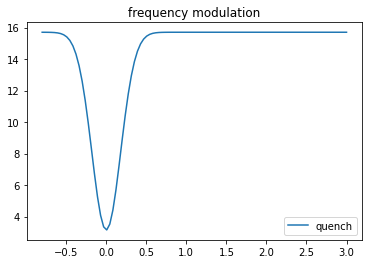

In [76]:
# plot different frequency modulations, to check that they are what I want them to be
tlist = np.linspace(-0.8,3,100)

# wQuench2 = wQQ(tlist, argsQQ['omegaArgs'])
wQuench = wQP(tlist, argsQ['omegaArgs'])
# wParam = wQP(tlist, argsP['omegaArgs'])
# wBoth = wQP(tlist, argsQP['omegaArgs'])

# plt.plot(tlist, wQuench2, label="quench")
plt.plot(tlist, wQuench, label="quench")
# plt.plot(tlist, wParam, label="parametric")
# plt.plot(tlist, wBoth,":", label="first quench, then parametric")
plt.legend()
plt.title("frequency modulation")
plt.show()

In [77]:
resultQ = mesolve(H, psi0, timesQ, args=argsQ)
# resultQ = mesolve(H, psi0, timesQ, args=argsQ)
# resultNix = mesolve(H, psi0, timesNix, args=argsNix)
# resultQP = mesolve(H, psi0, timesQP, args=argsQP)

<function matplotlib.pyplot.show(*args, **kw)>

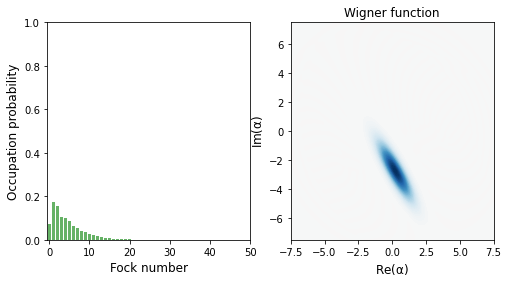

In [78]:
result = resultQ
psi = result.states[-1]

plot_wigner_fock_distribution(psi)
plt.show

|alpha|= 1.9511860603840305 , xi = (0.3390689053885449+0.6404564463317137j) , nBar = 4.430891518159781 , nT = 0.010192224189716319
xi = 0.7246738454292615 exp(i x 1.0838925485388762 )


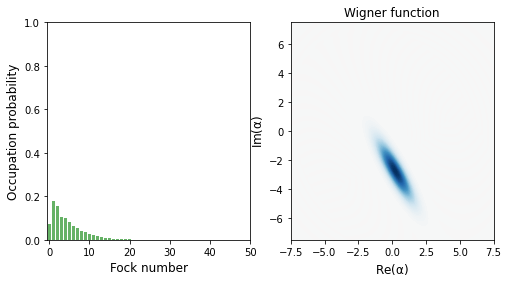

In [79]:
alpha, xi, nBar, nT = getParams(psi)
print('|alpha|=', np.abs(alpha), ', xi =', xi, ', nBar =', nBar, ', nT =', nT)
print('xi =', np.abs(xi), 'exp(i x', np.angle(xi), ')')
psi1 = displace(n, alpha)*squeeze(n, xi)*thermal_dm(n, nT)*squeeze(n, xi).dag()*displace(n, alpha).dag()
plot_wigner_fock_distribution(psi1)
plt.show()

 Progress: 100 %

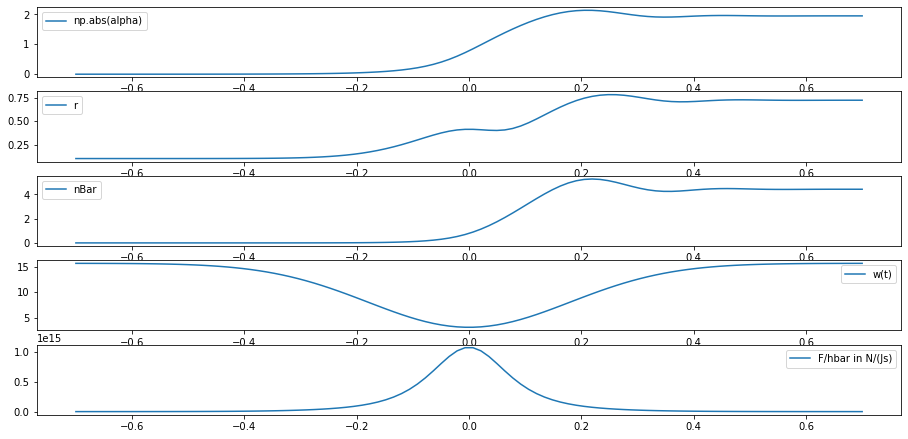

0

In [60]:
plotResults(timesQ, resultQ, argsQ, calculate_nT = False, nSkipp = 1, showProgress = True)

In [50]:
# FINISHED - DO NOT ACCIDENTLY CHANGE
# choose different pulse lengths and see what impact that has on alpha and xi

n = 50 # numerical accuracy
psi0 = thermal_dm(n, 0.01)
w0 = 2*np.pi * 2.5 # in MHz
T = 1/2.5

timesQ = np.linspace(-0.7,0.7, 100)
argsQ = {'n': n,
       'omega': wQP,
       'omegaDt': wQPdot,
       'omegaArgs': [w0, -0.8*w0, 0.18, 0, 0, 0],
       'f0': 100/(9*10**-15)}

dts = np.linspace(0.04, 1.6, 48) # from 0.1T to 4T
xis = []
alphas = []
for dt in dts:
    argsQ['omegaArgs'][2] = dt
    result = mesolve(H, psi0, timesQ, args=argsQ)
    alpha, xi,_,_ = getParams(result.states[-1], calculate_nT = False)
    
    xis.append(np.abs(xi))
    alphas.append(np.abs(alpha))
    print('\r', "Progress:", round(100*(dt-dts[0])/(dts[-1]-dts[0])), "%", end = '')

 Progress: 100.0 %

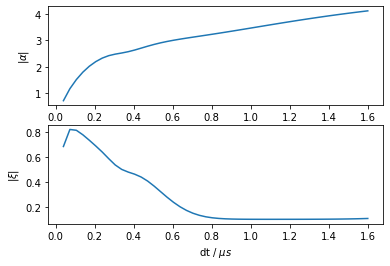

In [51]:
# FINISHED - DO NOT ACCIDENTLY CHANGE
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(dts, alphas)
ax1.set_ylabel(r'$|\alpha|$')
ax2.plot(dts, xis)
ax2.set_ylabel(r'$|\xi|$')
ax2.set_xlabel(r'dt / $\mu s$')
plt.show()

coherent displacement and squeezing depending on the pulse duration <br/>
For a gaussian pulse with minimum $\Delta \omega = -0.8 \omega_0$ and pulse durations $dt$ between $0.1 T$ and $2.2 T$ (with $T = 2 \pi/\omega_0$), the coherent displacement $|\alpha |$ and the squeezing $|\xi |$ are calculated. $|\alpha |$ rises monoton and $|\xi |$ has a maximum at very short pulse durations and decreases monotonly for higher $dt$. This shows that a single gaussian pulse is not sufficent to create a squeezed state without coherent displacement.

In [65]:
# check how alpha and xi (both r and t) depend on the pulse strength

n = 50 # numerical accuracy
psi0 = thermal_dm(n, 0.01)
w0 = 2*np.pi * 2.5 # in MHz
T = 1/2.5

timesQ = np.linspace(-1, 1, 200)
argsQ = {'n': n,
       'omega': wQP,
       'omegaDt': wQPdot,
       'omegaArgs': [w0, -0.8*w0, 0.18, 0, 0, 0],
       'f0': 100/(9*10**-15)}

dws = np.linspace(0, 0.8, 17) # from 0.1T to 4T
xiRs = []
xiTs = []
alphas2 = []
for dw in dws:
    argsQ['omegaArgs'][1] = -dw*w0
    result = mesolve(H, psi0, timesQ, args=argsQ)
    alpha, xi,_,_ = getParams(result.states[-1], calculate_nT = False)
    
    xiRs.append(np.abs(xi))
    if np.angle(xi)<0:
        xiTs.append(np.angle(xi) + 2*np.pi)
    else:
        xiTs.append(np.angle(xi))
    
    alphas2.append(np.abs(alpha))
    print('\r', "Progress:", round(100*(dw-dws[0])/(dws[-1]-dws[0])), "%", end = '')

 Progress: 100.0 %

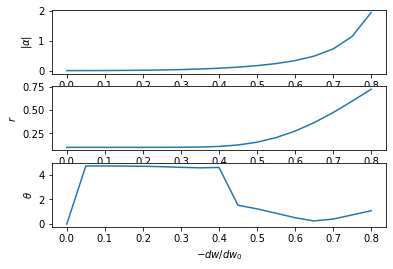

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(dws, alphas2)
ax1.set_ylabel(r'$|\alpha|$')

ax2.plot(dws, xiRs)
ax2.set_ylabel(r'$r$')

ax3.plot(dws, xiTs)
ax3.set_ylabel(r'$\theta$')
ax3.set_xlabel(r'$- dw / dw_0$')
plt.show()

dependence of $\alpha$ and $\xi = r e^\theta$ on the pulse strength

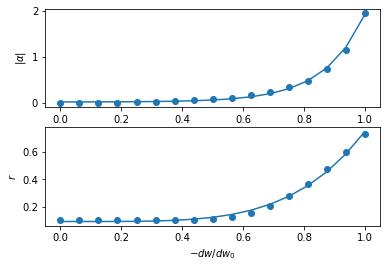

params for alpha: [1.00398440e-03 7.54397528e+00 1.96151888e-02] Errors: [5.05609276e-08 5.18454631e-02 9.83173120e-05]
params for xiR: [0.65237181 4.43040851 0.09222313] Errors: [1.33492771e-04 2.79816686e-02 2.25094345e-05]


In [81]:
# fit a quadratic polynom on the minimum to get a more exact position
def fitFktPol(x, a, b, c):
    return(a*(x**b) + c)

def fitFktExp(x, a, b, c):
    return(a*np.exp(b*x) + c)

xFit = dws/0.8
paramsA, paramsA_err = optimize.curve_fit(fitFktExp, xFit, alphas2, p0 = [1, 1, 0]) # do the fit for alpha
paramsX, paramsX_err = optimize.curve_fit(fitFktPol, xFit, xiRs, p0 = [1, 1, 0]) # do the fit for xi

fig, (ax1, ax2) = plt.subplots(2)

ax1.scatter(xFit, alphas2)
ax1.plot(xFit, fitFktExp(xFit, paramsA[0], paramsA[1], paramsA[2]))
ax1.set_ylabel(r'$|\alpha|$')

ax2.scatter(xFit, xiRs)
ax2.plot(xFit, fitFktPol(xFit, paramsX[0], paramsX[1], paramsX[2]))
ax2.set_ylabel(r'$r$')
ax2.set_xlabel(r'$- dw / dw_0$')
plt.show()

print("params for alpha:", paramsA, "Errors:", np.diagonal(paramsA_err))
print("params for xiR:", paramsX, "Errors:", np.diagonal(paramsX_err))

Fit of a polynomial or exponential function on the developement of dw <br/>
One finds that for the coherent displacement $\alpha$, an exponential fit of the form $\alpha(dw) = a \cdot exp(b \cdot dw) + c$ gives the best results. For the squeezing parameter $r$ a polynomial Fit of the form $r(dw) = a \cdot (dw)^b + c$ gives the best result.

Markdown celll